# **Python Financial Analysis for Beginners Case 1**

**The goal of this exercise was not to conduct an investment evaluation, but rather to demonstrate the advantages of using Python and the methodology for computing metrics such as Annual Return, Annualized Volatility, and Sharpe Ratio.**

To get a table with the annual return, volatility, and Sharpe ratio for a time series table of 6 securities with monthly prices of the last 5 years, you can use the following steps:

## 1) Calculate the monthly returns for each security.
## 2) Calculate the mean and standard deviation of the monthly returns for each security.
## 3) Calculate the annualized return and volatility for each security.
## 4) Calculate the risk-free rate (e.g. using the yield on 10-year treasury bonds).
## 5) Calculate the excess returns for each security by subtracting the risk-free rate from the annualized return.
## 5) Calculate the Sharpe ratio for each security as the excess return divided by the annualized volatility.
## 7) Combine the annualized return, volatility, and Sharpe ratio for each security into a table.

Note: For simplicity this example excludes dividends 

Here's an example implementation of these steps:

**The selected securities are:**


**VTI** - US Stock Market [](https://investor.vanguard.com/investment-products/etfs/profile/vti)

**VXUS** - International Stock ETF (exUS) [](https://investor.vanguard.com/investment-products/etfs/profile/vxus)

**BND** - Total Bond Market [](https://investor.vanguard.com/investment-products/etfs/profile/bnd)

**VWO** - Emerging Markets Stock ETF [](https://investor.vanguard.com/investment-products/etfs/profile/vwo)

**BTC** - Bitcoin in USD

**ETH** - Ethereum in USD



In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns

In [3]:
# Load the data from a CSV file
price_data = pd.read_csv('price_data.csv', parse_dates=['Date'])
print(price_data.tail())

           Date     VTI   VXUS    BND    VWO       BTC       ETH
1822 2022-12-27  190.62  52.02  71.97  39.36  16692.55  1210.730
1823 2022-12-28  188.22  51.40  71.87  38.79  16517.32  1186.710
1824 2022-12-29  191.68  52.24  72.14  39.46  16593.40  1194.744
1825 2022-12-30  191.19  51.72  71.84  38.98  16579.06  1197.707
1826 2022-12-31  191.19  51.72  71.84  38.98  16539.50  1199.371


## Visualize Hitorical Prices 

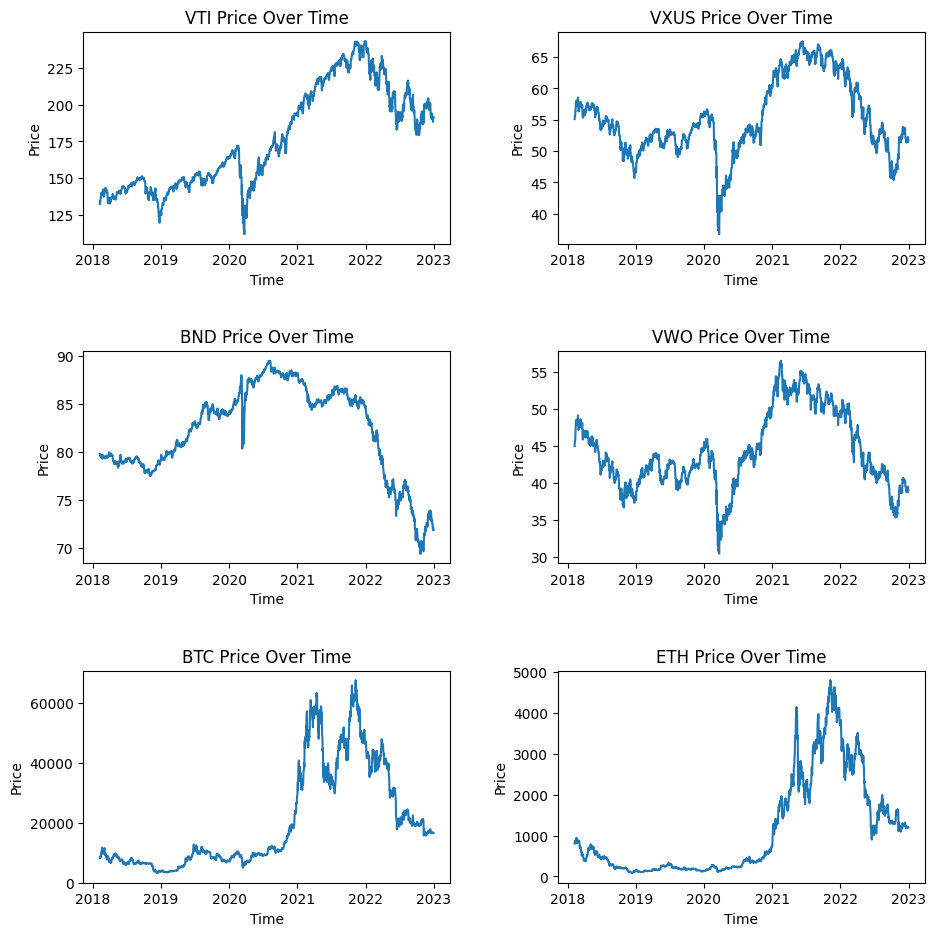

In [4]:
daily_prices = price_data.dropna()
daily_prices['Date'] = pd.to_datetime(daily_prices['Date'])
daily_prices.set_index('Date', inplace=True)

# create grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# plot each stock on a separate subplot
for i, column in enumerate(daily_prices.columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot(daily_prices[column])
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title(f'{column} Price Over Time')

# remove unused subplots and add space between subplots
fig.tight_layout(pad=3.0)

# show the chart
plt.show()



### In this example, we first load the monthly prices for the 6 securities from a CSV file into a DataFrame df. 
### 
### Then, we calculate the monthly returns for each stock using the pct_change() method of the DataFrame. 
### 
### Next, we calculate the mean and standard deviation of the monthly returns for each security using the mean() and std() methods of the DataFrame. 
### 
### We then use these values to calculate the annualized return and volatility for each security. 
### 
### We assume a risk-free rate of 1% per year and subtract it from the annualized return to get the excess return for each security. 
### 
### Finally, we calculate the Sharpe ratio for each security by dividing the excess return by the annualized volatility. 

We combine the results into a new DataFrame result and print it.

In [5]:
daily_prices = price_data.dropna()
daily_prices['Date'] = pd.to_datetime(daily_prices['Date'])
daily_prices.set_index('Date', inplace=True)

# calculate daily returns
daily_returns = daily_prices.pct_change()

# resample to monthly frequency and calculate monthly returns
returns = daily_returns.resample('M').apply(lambda x: (1+x).prod()-1)

# Calculate the mean and standard deviation of the monthly returns for each stock
mean_returns = returns.mean()
std_returns = returns.std()

# Calculate the annualized return and volatility for each stock
annual_returns = (1 + mean_returns) ** 12 - 1
annual_volatility = std_returns * np.sqrt(12)

# Calculate the risk-free rate (e.g. using the yield on 10-year treasury bonds)
risk_free_rate = 0.01

# Calculate the excess returns for each stock by subtracting the risk-free rate from the annualized return
excess_returns = annual_returns - risk_free_rate

# Calculate the Sharpe ratio for each stock as the excess return divided by the annualized volatility
sharpe_ratio = excess_returns / annual_volatility

# Combine the annualized return, volatility, and Sharpe ratio for each stock into a table
result = pd.concat([annual_returns, annual_volatility, sharpe_ratio], axis=1)
result.columns = ['Annual Return', 'Volatility', 'Sharpe Ratio']
print(result)


      Annual Return  Volatility  Sharpe Ratio
VTI        0.097695    0.193544      0.453101
VXUS       0.002737    0.176773     -0.041087
BND       -0.019731    0.052554     -0.565730
VWO       -0.012528    0.181507     -0.124115
BTC        0.563030    0.810641      0.682213
ETH        0.867346    1.096327      0.782016


### Conditional Format for the Table

In [6]:
# Define a function to apply formatting to the table
def format_table(val):
    if val > 0:
        return 'background-color: green; color: white; font-weight: bold'
    elif val < 0:
        return 'background-color: red; color: white; font-weight: bold'
    else:
        return ''

# Apply formatting to the table using the Styler class
styled_result = result.style.applymap(format_table)

# Display the formatted table
styled_result

,Annual Return,Volatility,Sharpe Ratio
VTI,0.097695,0.193544,0.453101
VXUS,0.002737,0.176773,-0.041087
BND,-0.019731,0.052554,-0.565730
VWO,-0.012528,0.181507,-0.124115
BTC,0.563030,0.810641,0.682213
ETH,0.867346,1.096327,0.782016


### Simple Scatter Plot to Visualize the Annualized Volatility vs. Annualized Return

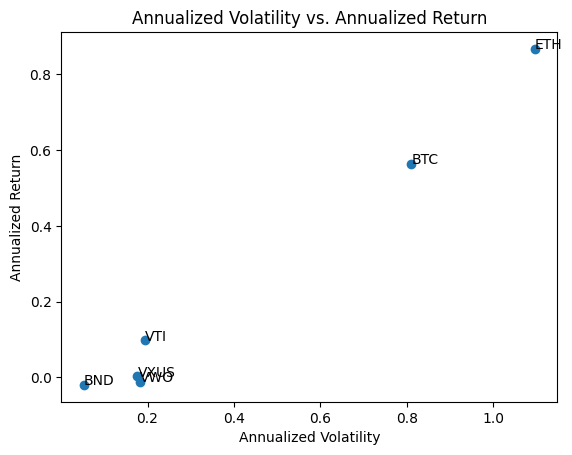

In [7]:
import matplotlib.pyplot as plt
stock_names = result.index

# Create the scatter plot
plt.scatter(annual_volatility, annual_returns)

# Set the plot title and axis labels
plt.title('Annualized Volatility vs. Annualized Return')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

for i, name in enumerate(stock_names):
    plt.text(annual_volatility[i], annual_returns[i], name)

# Show the plot
plt.show()

# Important Notes and Conclusions 

## The goal of this exercise was not to conduct an investment evaluation, but rather to demonstrate the advantages of using Python and the methodology for computing metrics such as Annual Return, Annualized Volatility, and Sharpe Ratio.

- ETH, BTC and VTI have the highest Sharpe Ratio 

- ETH and BTC have the highest Volatility

- VXUS, BND and VWO have low or negative return in this preriod. However, **the data excludes dividends**, and dividends are a part of the overall return of a stock, and excluding them can underestimate the total return of a stock. It is important to note, however, that excluding dividends can bias the comparison towards stocks that do not pay dividends, as their returns are solely based on capital appreciation. 

- However, there may be cases where comparing stock returns without dividends may be useful, such as when comparing the price performance of two growth stocks or when analyzing the returns of a stock index. 


## There are several benefits of using Python for performing simple financial analysis tasks such as calculating returns, volatility, and Sharpe ratio:

**Flexibility and Customization:** Python is a highly versatile programming language that allows you to customize your analysis to your specific needs. It provides a wide range of libraries and tools that make it easy to import, clean, and manipulate financial data in different formats. You can use Python to implement and test different financial models, create interactive visualizations, and automate repetitive tasks.

**Reproducibility:** Python provides a transparent and reproducible workflow for financial analysis. With Python, you can write code that documents every step of your analysis, making it easier for others to understand and replicate your work. You can also use version control tools like Git to track changes to your code and datasets, ensuring that your analysis is reproducible and auditable.

**Community Support:** Python has a large and active community of developers and users who contribute to the development of new libraries and tools for financial analysis. You can leverage this community to find solutions to common problems, get help with specific issues, and learn best practices for using Python for financial analysis.

**Scalability:** Python is scalable and can handle large datasets with ease. You can use tools like pandas and NumPy to process and analyze large financial datasets efficiently, reducing the time and resources required for your analysis.

**Integration:** Python can easily integrate with other tools and systems commonly used in financial analysis, such as databases, Excel spreadsheets, and APIs. This makes it easy to import and export data, automate workflows, and connect with other financial systems.

**Overall:** Python provides a powerful and flexible platform for performing financial analysis tasks, whether you are working with simple or complex datasets. Its versatility, reproducibility, community support, scalability, and integration capabilities make it a popular choice for financial analysts and researchers.

Sources: 
https://investor.vanguard.com/corporate-portal
https://www.datacamp.com/home
https://www.investopedia.com/terms/s/sharperatio.asp
https://chat.openai.com/chat
https://app.datacamp.com/learn/competitions/bitcoin-stock-portfolio



### Appendix

,Annual Return,Volatility,Sharpe Ratio
VTI,0.097695,0.193544,0.453101
VXUS,0.002737,0.176773,-0.041087
BND,-0.019731,0.052554,-0.565730
VWO,-0.012528,0.181507,-0.124115
BTC,0.563030,0.810641,0.682213
ETH,0.867346,1.096327,0.782016


,Annual Return,Volatility,Sharpe Ratio
VTI,0.097695,0.193544,0.453101
VXUS,0.002737,0.176773,-0.041087
BND,-0.019731,0.052554,-0.565730
VWO,-0.012528,0.181507,-0.124115
BTC,0.563030,0.810641,0.682213
ETH,0.867346,1.096327,0.782016


,Annual Return,Volatility,Sharpe Ratio
VTI,0.097695,0.193544,0.453101
VXUS,0.002737,0.176773,-0.041087
BND,-0.019731,0.052554,-0.565730
VWO,-0.012528,0.181507,-0.124115
BTC,0.563030,0.810641,0.682213
ETH,0.867346,1.096327,0.782016
